In [1]:
import numpy as np
import math
from Crypto.Util.number import getPrime, inverse, bytes_to_long, long_to_bytes
import random

In [8]:
def gcd(a, b):
    if b == 0:
        return a
    else:
        return gcd(b, a%b)

# Prerequisites

1. Modular exponentiation 
* https://crypto.stanford.edu/pbc/notes/numbertheory/exp.html
* https://en.wikipedia.org/wiki/Modular_exponentiation  
* https://www.geeksforgeeks.org/modular-exponentiation-power-in-modular-arithmetic/

2. Modular multiplicative inverse
* https://en.wikipedia.org/wiki/Modular_multiplicative_inverse

3. What is a trapdoor?
* https://en.wikipedia.org/wiki/Trapdoor_function

4. Euler's totient function
* https://crypto.stanford.edu/pbc/notes/numbertheory/units.html
* https://en.wikipedia.org/wiki/Euler%27s_totient_function

# Theory

**Euler’s Formula for $pq$.**  
Let $p$ and $q$ be distinct primes and let $g = gcd(p − 1, q − 1)$. Then  
$a^{(p−1)(q−1)/g} ≡ 1 \ (mod \ pq)$ for all $a$ satisfying $gcd(a, pq) = 1$.

In particular, if $p$ and $q$ are odd primes, then  
$a^{(p−1)(q−1)/2} ≡ 1 \ (mod \ pq)$ for all $a$ satisfying $gcd(a, pq) = 1$.

Let $p$ be a prime and let $e ≥ 1$ be an integer satisfying
$gcd(e, p−1) = 1$. $e$ has an inverse modulo $p − 1$, say  
$de ≡ 1 \ (mod \ p − 1)$.  
Then the congruence
$x^e ≡ c \ (mod \ p)$  
has the unique solution $x ≡ c^d \ (mod \ p)$.

Let p, q be distinct primes and let e ≥ 1 be an integer satisfying
$gcd(e, (p−1)(q-1)) = 1$. e has an inverse modulo (p − 1)(q-1), say  
$de ≡ 1 \ (mod \ (p − 1)(q-1))$.  
Then the congruence
$x^e ≡ c \ (mod \ pq)$  
has the unique solution $x ≡ c^d \ (mod \ pq)$.

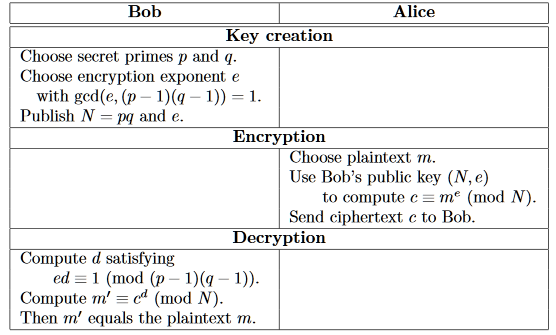

$d$ = decryption exponent (private)  
$e$ = encryption exponend (public)  
We usually work with $d$ and $e$ mod $(p-1)(q-1) = \varphi(N)$  

$m$ = message   
$c$ = ciphertext  
We usually work with $m$ and $c$ mod $N = p\cdot q$  

If you know $p$ or $q$ => you know $\varphi(N)$ => you can find $d$

# RSA code

## Toy implementation

In [9]:
def create_key_rsa(p, q, e):
    assert gcd(e, (p-1)*(q-1)) == 1
    N = p*q
    return N, e
def encrypt_rsa(m):
    assert m < N
    c = pow(m, e, N)
    return c
def decrypt_rsa(c, p, q, e, N):
    d = inverse(e, (p-1)*(q-1))
    assert (d * e) % ((p-1)*(q-1)) == 1
    m = pow(c, d, N)
    return m

In [10]:
p = 1223
q = 1987
e = 948047
N, e = create_key_rsa(p, q, e)
N, e

(2430101, 948047)

In [11]:
m = b'se'
#m = 1070777
m = bytes_to_long(m)
c = encrypt_rsa(m)
c

1850200

In [12]:
long_to_bytes(decrypt_rsa(c, p,q, e, N))

b'se'

## Library

https://pycryptodome.readthedocs.io/en/latest/src/public_key/rsa.html

In [13]:
from Crypto.PublicKey import RSA

In [15]:
key = RSA.generate(2048)

# More resources:

* https://leimao.github.io/article/RSA-Algorithm/
* https://en.wikipedia.org/wiki/RSA_(cryptosystem)
* https://people.csail.mit.edu/rivest/Rsapaper.pdf
* https://en.wikipedia.org/wiki/Fermat_number